**Demo for `teneva.sample_func`**

---

This module contains function for sampling from the functional TT-tensor (i.e., the tensor of interpolation coeeficients).

## Loading and importing modules

In [1]:
import numpy as np
import teneva
from time import perf_counter as tpc
np.random.seed(42)

## Function `sample_func`

Sample random points according to given functional probability TT-tensor.

In [2]:
Y = np.array([            # We generate 2D tensor for demo
    [0.1, 0.2, 0.3],
    [0. , 0. , 0. ],
    [0.2, 0.2, 0. ],
    [0. , 0. , 0. ],
])
Y = teneva.svd(Y)         # We compute its TT-representation
print(teneva.sum(Y))      # We print the sum of tensor elements

A = teneva.func_int(Y)    # We build TT-tensor of interpolation coefficients
x = teneva.sample_func(A) # And now we generate the sample
print(x)

1.0000000000000002
[0.08284621 0.37687245]


And now let check this function for big random TT-tensor:

In [3]:
# 5-dim random TT-tensor with TT-rank 5:
Y = teneva.rand([4]*5, 5)

# Compute the square of Y:
Y = teneva.mul(Y, Y)

# Normalize the tensor:
p = teneva.sum(Y)
Y = teneva.mul(Y, 1./p)

# Print the resulting TT-tensor:
teneva.show(Y)

# Build TT-tensor of interpolation coefficients:
A = teneva.func_int(Y)

# Generate the sample:

x = teneva.sample_func(A)
print('\n--- Result:', x)

TT-tensor     5D : |4|  |4|  |4|  |4|  |4|
<rank>  =   25.0 :   \25/ \25/ \25/ \25/

--- Result: [ 0.48636143 -0.23270503  0.89096649 -0.21183212 -0.83638939]


Note that we can also set a random seed value:

In [4]:
x = teneva.sample_func(A, seed=42)
print('\n--- Result:', x)


--- Result: [ 0.48636143 -0.23270503  0.89096649 -0.21183212 -0.83638939]


We can also check the generated distribution (note that matplotlib is used below):

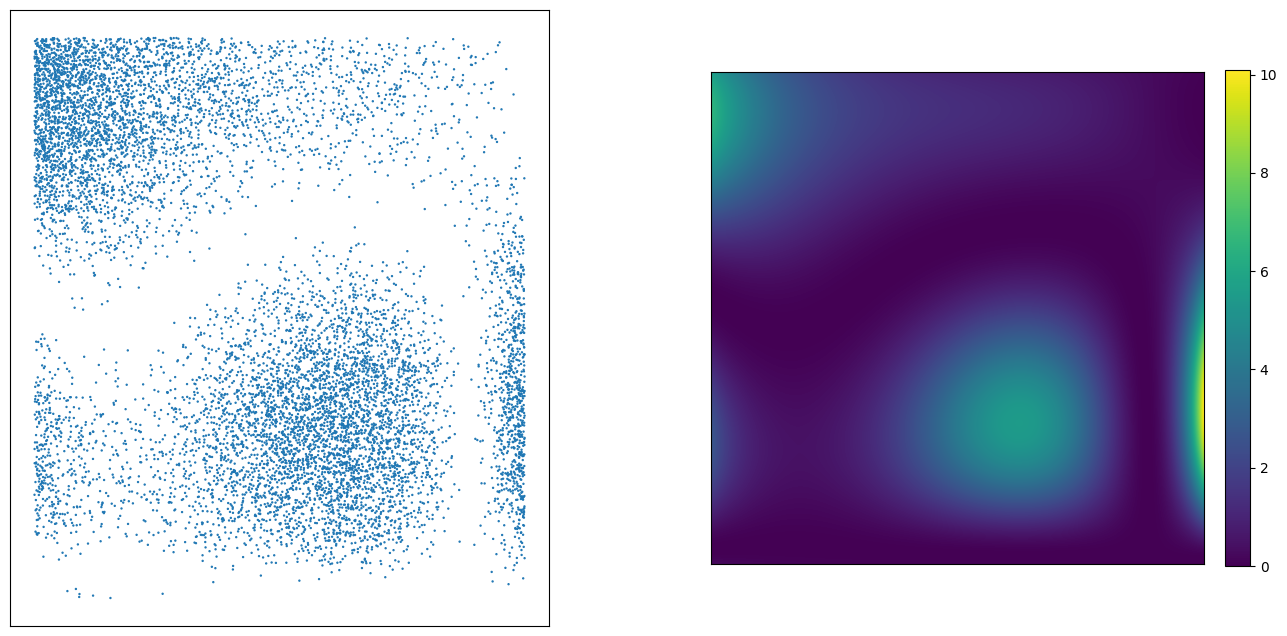

In [5]:
import matplotlib.pyplot as plt

samples = int(1.E+4)

A = teneva.rand([4]*2, 2)

X = np.array([teneva.sample_func(A, seed=s) for s in range(samples)])

N = 512
X_m = np.linspace(-1, 1, N)
x, y = np.meshgrid(X_m, X_m)
x = x.reshape(-1)
y = y.reshape(-1)
y = teneva.func_get(np.array([x, y]).T, A, -1, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.3)
im = ax1.scatter(X[:, 0], X[:, 1], s=[.5]*samples)
im = ax2.imshow(y.reshape(N, -1)**2, origin='lower')
plt.colorbar(im, fraction=0.046, pad=0.04)
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

---